In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [68]:
# Load the dataset
data = pd.read_csv('framingham_heart_study.csv')
data.dropna(inplace=True)  

# Separate features and target
X = data.drop(columns=['TenYearCHD'])  # Features
y = data['TenYearCHD']                 # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters for binary classification
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster_Label'] = clusters

# Map clusters to patient risk groups (e.g., High-Risk or Low-Risk)
risk_mapping = {0: 'Low Risk', 1: 'High Risk'}  # Adjust based on your data exploration
data['Risk_Group'] = data['Cluster_Label'].map(risk_mapping)

In [72]:
# Display the first few rows of the dataset with risk groups
print(data[['Cluster_Label', 'Risk_Group']].head())

# Output the number of patients in each risk group
print("\nNumber of patients in each risk group:")
print(data['Risk_Group'].value_counts())

   Cluster_Label Risk_Group
0              1  High Risk
1              1  High Risk
2              1  High Risk
3              0   Low Risk
4              1  High Risk

Number of patients in each risk group:
Risk_Group
High Risk    2485
Low Risk     1173
Name: count, dtype: int64


In [74]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


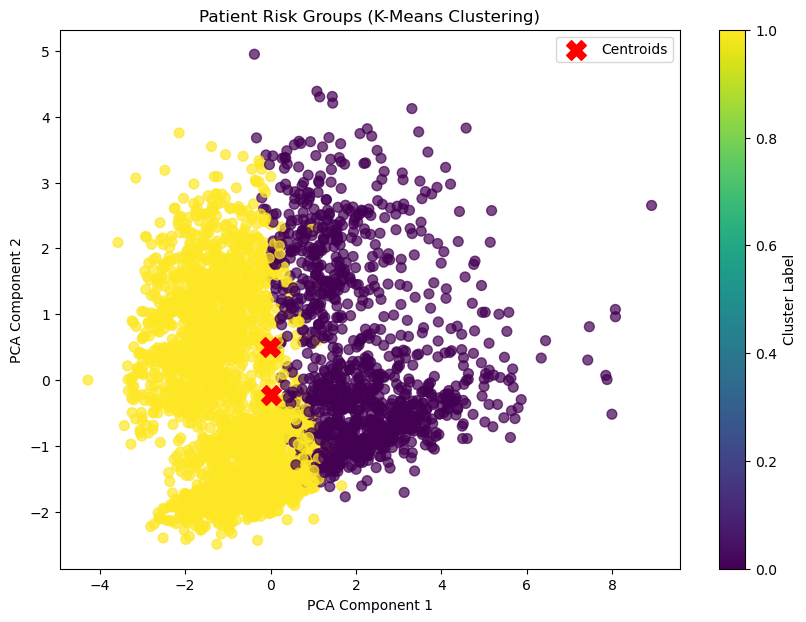

In [76]:
# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Patient Risk Groups (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

In [78]:
# Map clusters to actual labels
data['Cluster'] = clusters
cluster_labels = data.groupby('Cluster')['TenYearCHD'].apply(lambda x: x.value_counts().idxmax())
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

In [80]:
# Calculate accuracy and other metrics
clustering_accuracy = accuracy_score(y, data['Cluster_Label'])
ari_score = adjusted_rand_score(y, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

In [82]:
# Display metrics
print("K-Means Clustering Evaluation:")
print(f"Clustering Accuracy (Mapped): {clustering_accuracy * 100:.2f}%")
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

K-Means Clustering Evaluation:
Clustering Accuracy (Mapped): 84.77%
Adjusted Rand Index (ARI): 0.08
Silhouette Score: 0.21
